In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measure = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent = session.query(measure.date).order_by(measure.date.desc()).first()
recent

('2017-08-23',)

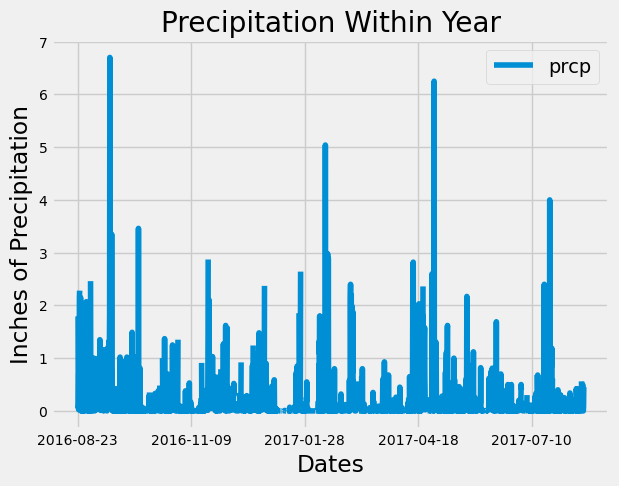

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Calculate the date one year from the last date in data set.
year_from_current = (dt.date(2017,8,23)) - (dt.timedelta(days = 365))

# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(measure.date,measure.prcp).filter(measure.date >= year_from_current)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_df = pd.DataFrame(date_prcp)

# Sort the dataframe by date
year_sorted = year_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
year_sorted.plot(x="date",y="prcp")
plt.xlabel("Dates")
plt.ylabel("Inches of Precipitation")
plt.title("Precipitation Within Year")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
sum_prcp = year_df.describe()
sum_prcp

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(func.count(station.station)).all()
stations

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_active = session.query(station.station, func.count(measure.station)).\
    join(measure, measure.station == station.station).\
    group_by(measure.station).\
    order_by(func.count(measure.station).desc()).all()
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calc_active_station = session.query(func.min(measure.tobs),
                                   func.max(measure.tobs),
                                   func.avg(measure.tobs)).\
    group_by(measure.station).\
    order_by(func.count(measure.station).desc()).first()

calc_active_station

(54.0, 85.0, 71.66378066378067)

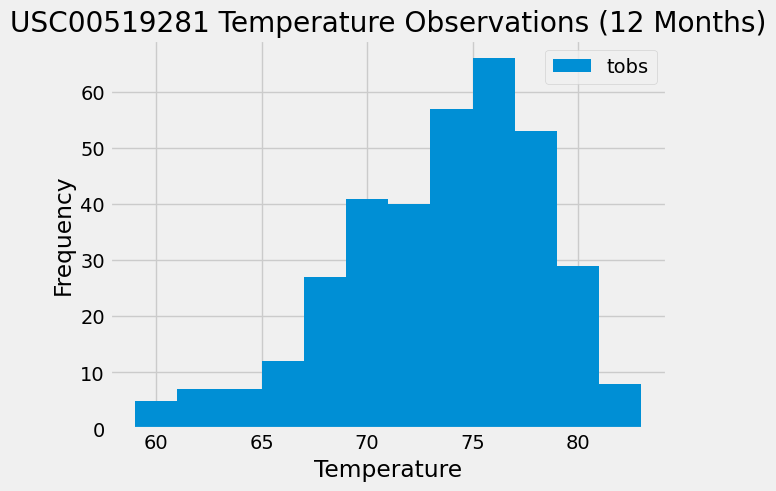

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observe = session.query(measure.date, measure.tobs).\
                            filter (measure.station == "USC00519281").\
                            filter (measure.date >= year_from_current).all()

temp_observe_df = pd.DataFrame(temp_observe)
temp_observe_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("USC00519281 Temperature Observations (12 Months)")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()